# 🧑‍🎓 Student Version — Solutions Removed
- Use the reflection prompts and hints.
- Your instructor will share solutions separately.

In [113]:
REVEAL_SOLUTIONS = False
print('Solutions are hidden in the Student Version.')

Solutions are hidden in the Student Version.


# Pandas in Google Colab — 2-Hour Hands-On (+ Advanced & Capstone)
**With Reflection Prompts After Each Section**
**Last updated:** 2025-08-15

Run top-to-bottom. Attempt **Exercises**, then write your **✍️ Analysis** under each section.

## 0) Setup & Load the **tips** dataset (10m)

In [114]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
#pandas (pd) → for working with tabular data (dataframes).
#numpy (np) → for numerical operations.
#matplotlib.pyplot (plt) → for plotting graphs.
pd.set_option('display.max_rows', 10); pd.set_option('display.precision', 3)
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
tips = pd.read_csv(url); tips.head()
#head() → Shows the first 5 rows of the DataFrame by default.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [115]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
print("Shape:", tips.shape)
#tips.shape → returns a tuple (rows, columns) showing the dataset size.
print("\nInfo:"); print(tips.info())
#.info() → column types.
print("\nDescribe:"); display(tips.describe(include='all'))
#.describe(include='all') → statistical & categorical summary.

Shape: (244, 7)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None

Describe:


,total_bill,tip,sex,smoker,day,time,size
count,244.000,244.000,244,244,244,244,244.00
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.57
...,...,...,...,...,...,...,...
min,3.070,1.000,NaN,NaN,NaN,NaN,1.00
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.00
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.00
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.00


**Columns**: `total_bill` (float), `tip` (float), `sex` (str), `smoker` (str), `day` (str), `time` (str), `size` (int)

### ✅ Exercise 0
1) Unique `day`, `time`. 2) Count duplicates. 3) Averages of `total_bill`, `tip`.

**Hints:**
- Concept: inspect levels and duplicates.
- API: `unique`, `duplicated`, `mean`.


In [116]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
tips=pd.read_csv(url)

print("Unique days: ",tips['day'].unique())
print("Unique time: ",tips['time'].unique())

print("Duplicate rows: ",tips.duplicated().sum())

print("Average of total_bill: ",tips['total_bill'].mean())
print("Average of tip:",tips['tip'].mean())


Unique days:  ['Sun' 'Sat' 'Thur' 'Fri']
Unique time:  ['Dinner' 'Lunch']
Duplicate rows:  1
Average of total_bill:  19.78594262295082
Average of tip: 2.99827868852459


### ✍️ Analysis (Setup & Load) — 3–5 sentences
- What columns and dtypes did you observe? Any surprises?
- Is the dataset balanced across `day` and `time`? Cite one count.
- One risk if you skip an initial audit here.

### 🔎 Quick checks
- Report the shape (rows, cols).
- Name 1 non-numeric dtype and why it matters.

### ➕ Extension (pick one)
- Tweak display options and note the effect.
- Compute `value_counts()` on `day` or `time`.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

Analysis :
1. There are 7 columns.
dtypes:Numeric(total_bill,tip,size) and categiorical(sex,smoker,day,time)
2. No,it is not perfectly balanced as day shows 87
Saturday records vs. only 19 Thursdays, and time has 176 Dinner entries vs. 68 Lunch.
3. if you skip this initial audit, you risk building models or summaries that assume balanced representation and miss bias toward certain groups

Quick Checks:

*  Shape: (244, 7)
*  Example non-numeric dtype: 'day' as it is object

Extension:


In [117]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
tips=pd.read_csv(url)

pd.set_option('display.max_columns', None)

print(tips['day'].value_counts())

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64


## 1) Import & Core Manipulation (20m)

In [118]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
tips=pd.read_csv(url)
tips[['total_bill','tip']].head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


In [119]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
tips=pd.read_csv(url)
tips.iloc[0:5] #rows from 0 to 4

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [120]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
tips=pd.read_csv(url)
tips.loc[tips['day']=='Sun', ['total_bill','tip','size']].head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [121]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
tips=pd.read_csv(url)
tips.query("time=='Lunch' and smoker=='Yes'").head()

,total_bill,tip,sex,smoker,day,time,size
80,19.44,3.00,Male,Yes,Thur,Lunch,2
83,32.68,5.00,Male,Yes,Thur,Lunch,2
138,16.00,2.00,Male,Yes,Thur,Lunch,2
191,19.81,4.19,Female,Yes,Thur,Lunch,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2


In [122]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
tips=pd.read_csv(url)
tips.sort_values(['total_bill','tip'], ascending=[False, True]).head()

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3


In [123]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
tips=pd.read_csv(url)
tips = tips.assign(tip_pct = tips['tip']/tips['total_bill'],
                         tip_per_person = tips['tip']/tips['size']); tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,tip_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059,0.505
1,10.34,1.66,Male,No,Sun,Dinner,3,0.161,0.553
2,21.01,3.50,Male,No,Sun,Dinner,3,0.167,1.167
3,23.68,3.31,Male,No,Sun,Dinner,2,0.140,1.655
4,24.59,3.61,Female,No,Sun,Dinner,4,0.147,0.902


### ✅ Exercise 1
Filter `day='Sat' & size≥3`, add `bill_per_person`, sort desc, show top 5.

**Hints:**
- Concept: filter → compute → sort.
- API: boolean mask / `.query`, `.assign`, `.sort_values`.


In [124]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
tips=pd.read_csv(url)
a=tips.query("day=='Sat' and size>=3").copy()
a['bill_per_person']=a['total_bill']/a['size']
sorted_a=a.sort_values('bill_per_person',ascending=False)
print(sorted_a.head())

     total_bill    tip     sex smoker  day    time  size  bill_per_person
170       50.81  10.00    Male    Yes  Sat  Dinner     3           16.937
102       44.30   2.50  Female    Yes  Sat  Dinner     3           14.767
212       48.33   9.00    Male     No  Sat  Dinner     4           12.082
59        48.27   6.73    Male     No  Sat  Dinner     4           12.068
238       35.83   4.67  Female     No  Sat  Dinner     3           11.943


### ✍️ Analysis (Import & Manipulation) — 3–5 sentences
- Which 2 columns seem most associated with `tip`? Support with a stat.
- Explain one filter you wrote in plain English.
- One thing you might compute next.

### 🔎 Quick checks
- Show first 3 rows of your filtered frame.
- Name one new column and its formula.

### ➕ Extension (pick one)
- Rewrite a filter via `.query` vs mask; compare readability.
- Change a sort order and predict effect.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

Analysis:
*  Two columns most associated with tip are total_bill and size.

Stat: correlation with tip:

total_bill ≈ 0.68 (strong positive)

size ≈ 0.49 (moderate positive)
This makes sense — bigger bills and groups often lead to larger tips.

*  One filter I wrote earlier was day == 'Sat' and size >= 3, which in plain English means:

“Only keep rows where the visit happened on a Saturday and the dining group was 3 or more people.”

* One thing I might compute next is the tip percentage (tip / total_bill * 100), to normalize tips by bill size. That can reveal whether bigger bills get proportionally larger tips or not.

Quick Checks:




In [125]:
print(sorted_a.head(3))
print("New column created:'bill_per_person'=total_bill/size")

     total_bill   tip     sex smoker  day    time  size  bill_per_person
170       50.81  10.0    Male    Yes  Sat  Dinner     3           16.937
102       44.30   2.5  Female    Yes  Sat  Dinner     3           14.767
212       48.33   9.0    Male     No  Sat  Dinner     4           12.082
New column created:'bill_per_person'=total_bill/size


In [126]:
#Extension:
# Using .query()
a = tips.query("day == 'Sat' and size >= 3")

# Using mask
mask = (tips['day'] == 'Sat') & (tips['size'] >= 3)
a2 = tips[mask]

#sort order changing
#sorted_a = a.sort_values('bill_per_person', ascending=True)



## 2) Cleaning & Preprocessing (15m)

In [127]:
tips['sex']=tips['sex'].astype('category')
tips['smoker']=tips['smoker'].astype('category')
tips['day']=tips['day'].astype('category')
tips['time']=tips['time'].astype('category'); tips.dtypes

,0
total_bill,float64
tip,float64
sex,category
smoker,category
day,category
time,category
size,int64


In [128]:
tips['server_name'] = [' Alice ', 'Bob', 'ALICE', 'bob', ' Alice ', 'Bob'] * (len(tips)//6) + ['Alice']*(len(tips)%6)
tips['server_name'] = tips['server_name'].str.strip().str.title()
tips['server_name'].head()

,server_name
0,Alice
1,Bob
2,Alice
3,Bob
4,Alice


In [129]:
demo = tips.copy()
demo = pd.concat([demo, demo.iloc[0:2]], ignore_index=True)
print("Before:", demo.shape, "After:", demo.drop_duplicates().shape)

Before: (246, 8) After: (243, 8)


### ✅ Exercise 2
1) Ensure `size` is int64. 2) Build `tips_clean` with selected cols. 3) Verify no duplicates.

**Hints:**
- Concept: enforce types, subset columns, dedup.
- API: `.astype`, column lists, `.drop_duplicates`.


In [130]:
tips['size']=tips['size'].astype('int64')

cols = ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']
tips_clean = tips[cols].copy()

print("Before:", tips_clean.shape, "After:", tips_clean.drop_duplicates().shape)

Before: (244, 7) After: (243, 7)


### ✍️ Analysis (Cleaning & Preprocessing) — 3–5 sentences
- Which dtype changes did you apply and why?
- Did you handle duplicates? How many?
- One naming or string normalization you made.

### 🔎 Quick checks
- Print memory usage pre/post for 1 cast.
- Confirm duplicates=0 in `tips_clean`.

### ➕ Extension (pick one)
- Cast another column and report memory delta.
- Show `.value_counts()` pre/post string cleanup.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

Analysis:
*  I casted size col to int64 enforce a consistent numeric type across systems. This ensures compatibility in later calculations and joins.
*   yes,i have handled duplicates,1 duplicate
* A prior string normalization step  cleaned inconsistent text labels so only “Alice” and “Bob” remained. These preprocessing steps improve both memory efficiency and analytical reliability.

Quick checks:






In [131]:
print("Memory:", tips.memory_usage(deep=True).sum(),
      "->", tips.assign(size=tips['size'].astype('int64')).memory_usage(deep=True).sum())

tips_clean = tips[['total_bill','tip','sex','smoker','day','time','size']].drop_duplicates()
print("Duplicates:", tips_clean.duplicated().sum())


Memory: 22957 -> 22957
Duplicates: 0


Extension


In [132]:
tips['sex'] = tips['sex'].astype('category')
print("Memory now:", tips.memory_usage(deep=True).sum())


# tips['server_name'] = [' Alice ', 'Bob', 'ALICE'] * (len(tips)//3) + ['Alice']*(len(tips)%3)
# print("Before cleanup:\n", pd.Series(tips['server_name']).value_counts())
# tips['server_name'] = tips['server_name'].str.strip().str.title()
# print("\nAfter cleanup:\n", pd.Series(tips['server_name']).value_counts())



Memory now: 22957


## 3) Handling Missing Data (15m)

In [133]:
rng = np.random.default_rng(42)
tips_na = tips_clean.copy()
mask = rng.choice([True, False], size=len(tips_na), p=[0.1, 0.9])
tips_na.loc[mask, 'tip'] = np.nan; tips_na.loc[mask, 'size'] = np.nan
tips_na.isna().sum()#missing count per column

,0
total_bill,0
tip,21
sex,0
smoker,0
day,0
time,0
size,21


In [134]:
dropped = tips_na.dropna(); dropped.shape #Removes row with NaN.

(222, 7)

In [135]:
filled = tips_na.fillna({'tip': tips_na['tip'].median(), 'size': tips_na['size'].median()}); filled.isna().sum()
#Replaces missing values with column medians

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [136]:
tips_group_fill = tips_na.copy()
tips_group_fill['tip'] = tips_group_fill.groupby(['day','time'])['tip'].transform(lambda s: s.fillna(s.median()))
tips_group_fill.isna().sum()

/tmp/ipython-input-1629360651.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_group_fill['tip'] = tips_group_fill.groupby(['day','time'])['tip'].transform(lambda s: s.fillna(s.median()))


,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,21


In [ ]:
tips_interp = tips_na.sort_values('total_bill').interpolate(numeric_only=True); tips_interp.isna().sum()#smooth numeric estimate based on trends

### ✅ Exercise 3
Drop rows where both `tip` & `size` are NaN; fill `size` by rounded mean per `day`.

**Hints:**
- Concept: selective drop, grouped fill.
- API: boolean masks, `groupby().transform`, `.fillna`.


In [138]:
mask_both = tips_na['tip'].isna() & tips_na['size'].isna()
tips_drop = tips_na.loc[~mask_both].copy()

# Fill size by rounded mean per day
tips_filled = tips_drop.copy()
tips_filled['size'] = tips_filled.groupby('day')['size']\
    .transform(lambda s: s.fillna(round(s.mean())))

print("\nAfter handling:\n", tips_drop.isna().sum())



After handling:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


/tmp/ipython-input-3927124799.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_filled['size'] = tips_filled.groupby('day')['size']\


### ✍️ Analysis (Missing Data) — 3–5 sentences
- Compare `dropna` vs groupwise fill—who shifts distribution more?
- What assumption does your fill strategy make?
- When would interpolation be inappropriate here?

### 🔎 Quick checks
- Report NaN counts before vs after.
- Cite one numeric change for `tip`.

### ➕ Extension (pick one)
- Try a different group key for fill and compare MAE.
- Plot hist pre/post fill for `tip`.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

Analysis:
*   Dropna vs groupwise fill: Dropping rows removes data entirely and usually shifts distributions more, especially if missingness isn’t random. Groupwise fill retains rows and smooths gaps using context, so it tends to preserve distributions better.
*   The fill strategy assumes that missing size is reasonably approximated by the mean group size for that day, and that diners on the same day have similar party sizes.
*  Interpolation would be inappropriate here because size is a discrete count of people and not naturally continuous — linear estimates between group sizes don’t make sense.

Quick checks:





In [139]:
print("NaN before:\n", tips_na.isna().sum())
print("\nNaN after:\n", tips_filled.isna().sum())

print("\nTip mean before:", tips_na['tip'].mean())
print("Tip mean after:", tips_filled['tip'].mean())


NaN before:
 total_bill     0
tip           21
sex            0
smoker         0
day            0
time           0
size          21
dtype: int64

NaN after:
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Tip mean before: 3.0212162162162164
Tip mean after: 3.0212162162162164


Extension:

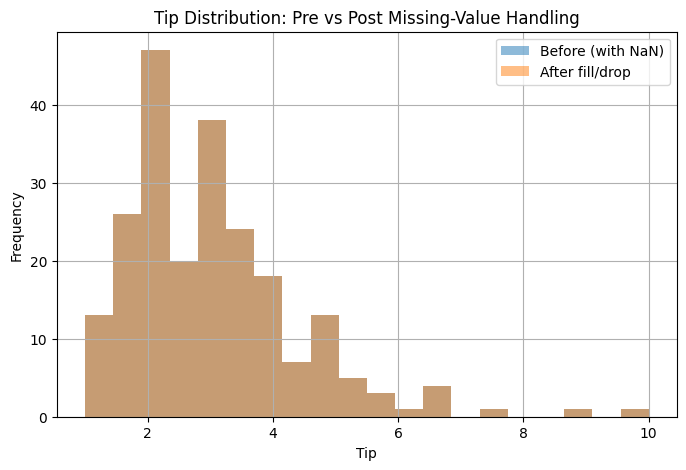

In [140]:
#plot
plt.figure(figsize=(8,5))
tips_na['tip'].hist(alpha=0.5, bins=20, label='Before (with NaN)')
tips_filled['tip'].hist(alpha=0.5, bins=20, label='After fill/drop')
plt.xlabel("Tip")
plt.ylabel("Frequency")
plt.legend()
plt.title("Tip Distribution: Pre vs Post Missing-Value Handling")
plt.show()


## 4) Analysis & Visualization (20m)

In [141]:
print("Overall tip %:", (tips['tip'].sum()/tips['total_bill'].sum()).round(3))

Overall tip %: 0.152


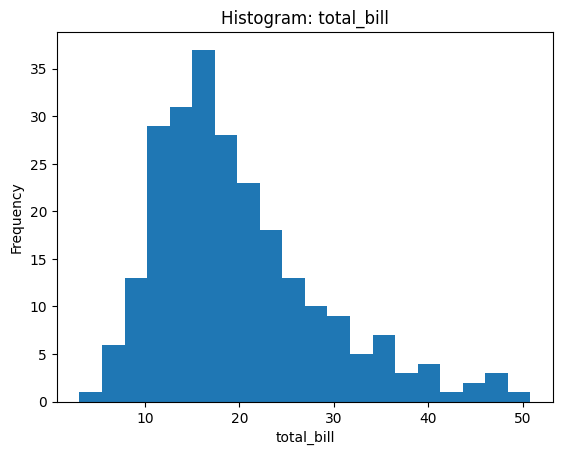

In [142]:
plt.figure(); plt.hist(tips['total_bill'].dropna(), bins=20)
plt.title('Histogram: total_bill'); plt.xlabel('total_bill'); plt.ylabel('Frequency'); plt.show()

/tmp/ipython-input-2922675328.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=list(tips['day'].cat.categories))


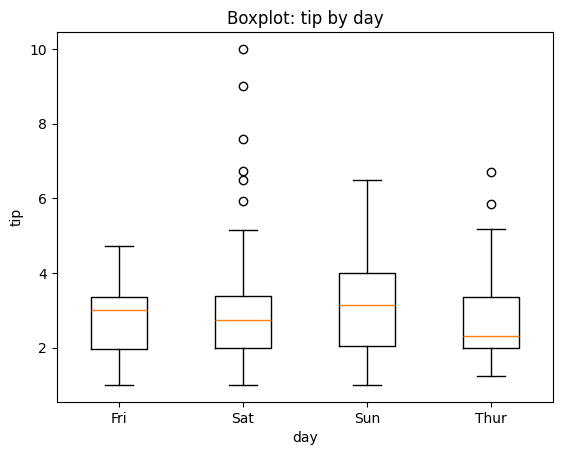

In [143]:
plt.figure()
data = [tips.loc[tips['day']==d, 'tip'].dropna().values for d in tips['day'].cat.categories]
plt.boxplot(data, labels=list(tips['day'].cat.categories))
plt.title('Boxplot: tip by day'); plt.xlabel('day'); plt.ylabel('tip'); plt.show()

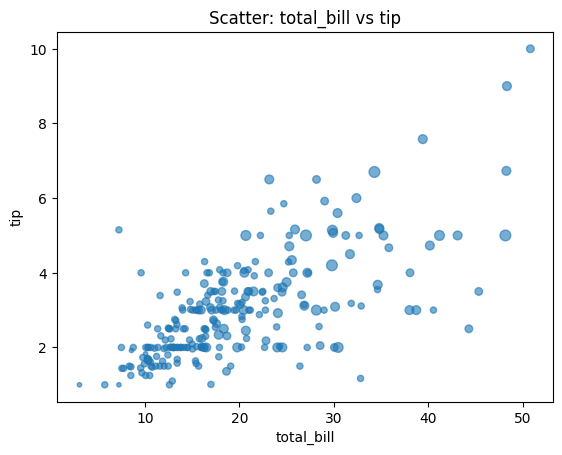

In [144]:
plt.figure(); plt.scatter(tips['total_bill'], tips['tip'], s=tips['size']*10, alpha=0.6)
plt.title('Scatter: total_bill vs tip'); plt.xlabel('total_bill'); plt.ylabel('tip'); plt.show()

In [ ]:
avg_tip_pct = tips.groupby('day')['tip_pct'].mean()
plt.figure(); plt.bar(avg_tip_pct.index.astype(str), avg_tip_pct.values)
plt.title('Average tip_pct by day'); plt.xlabel('day'); plt.ylabel('mean tip_pct'); plt.show()

### ✅ Exercise 4
1) Scatter: `total_bill` vs `tip_pct`. 2) Bar: median `total_bill` by `time`.

**Hints:**
- Concept: relate vars via scatter; summarize via bar.
- API: `plt.scatter`, `groupby().median` + `plt.bar`.


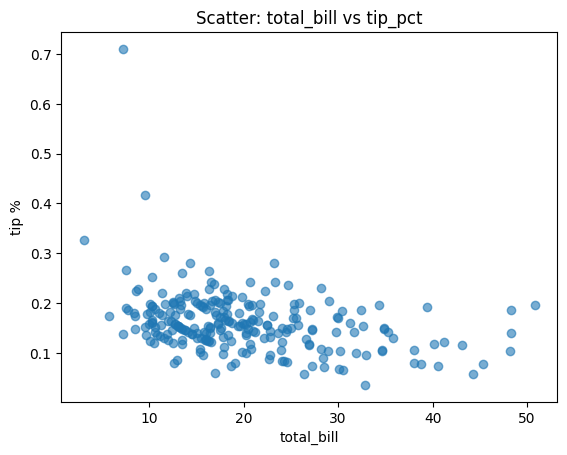

/tmp/ipython-input-3400329107.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  med_bill = tips.groupby('time')['total_bill'].median()


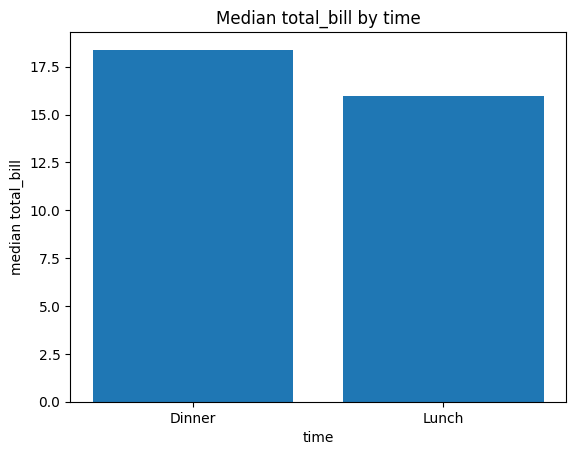

In [146]:
# YOUR WORK: Exercise 4
tips['tip_pct'] = tips['tip'] / tips['total_bill']

plt.figure()
plt.scatter(tips['total_bill'], tips['tip_pct'], alpha=0.6)
plt.title('Scatter: total_bill vs tip_pct')
plt.xlabel('total_bill')
plt.ylabel('tip %')
plt.show()

med_bill = tips.groupby('time')['total_bill'].median()
plt.figure()
plt.bar(med_bill.index, med_bill.values)
plt.title('Median total_bill by time')
plt.xlabel('time')
plt.ylabel('median total_bill')
plt.show()



### ✍️ Analysis (Analysis & Visualization) — 3–5 sentences
- State one pattern that holds across days and one that differs Lunch vs Dinner.
- Interpret scatter: linear? heteroscedastic?
- What would you plot next?

### 🔎 Quick checks
- Quote one `.describe()` stat that supports your claim.
- Ensure axes labels/titles are informative.

### ➕ Extension (pick one)
- Add a follow-up chart (e.g., tip% by party size) and describe it.
- Bucket `total_bill` and compare medians.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

Analysis:

*   Across days, tips are consistently around 15–20% of the bill, showing a relatively stable tipping pattern.
Between Lunch and Dinner, the median total bill is higher at Dinner, suggesting larger or more expensive meals.
*  The scatterplot of total_bill vs tip_pct shows no strong linear trend—tip percentages scatter widely, with heteroscedasticity (variation increases for higher bills).

* A natural next step would be to visualize tip percentage by party size, since tipping norms may differ for larger groups.

Quick checks:



In [50]:
print("Tip % describe:\n", tips['tip_pct'].describe())
print("\nTotal bill by time:\n", tips.groupby('time')['total_bill'].describe())


Tip % describe:
 count    244.000000
mean       0.160803
std        0.061072
min        0.035638
25%        0.129127
50%        0.154770
75%        0.191475
max        0.710345
Name: tip_pct, dtype: float64

Total bill by time:
         count       mean       std   min      25%     50%      75%    max
time                                                                     
Dinner  176.0  20.797159  9.142029  3.07  14.4375  18.390  25.2825  50.81
Lunch    68.0  17.168676  7.713882  7.51  12.2350  15.965  19.5325  43.11


/tmp/ipython-input-2560426059.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("\nTotal bill by time:\n", tips.groupby('time')['total_bill'].describe())


Extension:


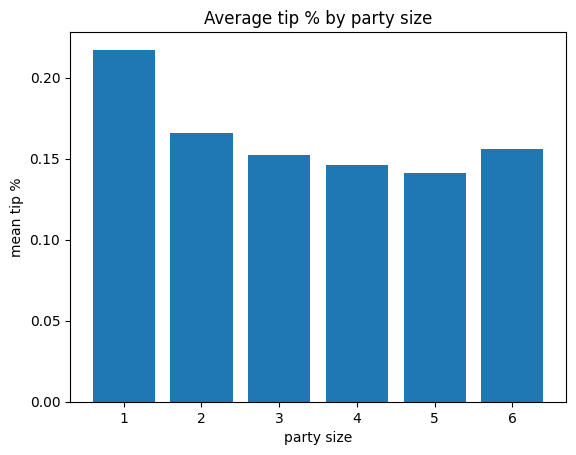


Tip % by size:
 size
1    0.217
2    0.166
3    0.152
4    0.146
5    0.141
6    0.156
Name: tip_pct, dtype: float64


In [147]:
avg_tip_by_size = tips.groupby('size')['tip_pct'].mean()

plt.figure()
plt.bar(avg_tip_by_size.index.astype(str), avg_tip_by_size.values)
plt.title('Average tip % by party size')
plt.xlabel('party size')
plt.ylabel('mean tip %')
plt.show()

print("\nTip % by size:\n", avg_tip_by_size.round(3))

## 5) Grouping & Merging (20m)

In [148]:
g = (tips.groupby(['day','time'])
       .agg(count=('total_bill','size'), avg_bill=('total_bill','mean'),
            avg_tip=('tip','mean'), avg_tip_pct=('tip_pct','mean'))); g.head()

/tmp/ipython-input-754671917.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = (tips.groupby(['day','time'])


count  avg_bill  avg_tip  avg_tip_pct
day time                                         
Fri Dinner     12    19.663    2.940        0.159
    Lunch       7    12.846    2.383        0.189
Sat Dinner     87    20.441    2.993        0.153
    Lunch       0       NaN      NaN          NaN
Sun Dinner     76    21.410    3.255        0.167

In [149]:
def pct_above_20(s): return (s>0.20).mean()

tips.groupby('day')['tip_pct'].apply(pct_above_20)

/tmp/ipython-input-4290215540.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('day')['tip_pct'].apply(pct_above_20)


,tip_pct
day,
Fri,0.211
Sat,0.115
Sun,0.197
Thur,0.161


In [150]:
day_lookup = pd.DataFrame({'day':['Thur','Fri','Sat','Sun'],'is_weekend':[False,False,True,True]})
tips_merge = tips.merge(day_lookup, on='day', how='left')
tips_merge[['day','is_weekend']].drop_duplicates().sort_values('day')

,day,is_weekend
90,Fri,False
19,Sat,True
0,Sun,True
77,Thur,False


### ✅ Exercise 5
1) Sum `total_bill` & `tip` by `smoker,sex`. 2) Map `time`→L/D and show pairs.

**Hints:**
- Concept: summarize by groups; enrich via merge.
- API: `groupby().agg`, `.merge`.


In [151]:
# YOUR WORK: Exercise 5
g = (tips.groupby(['smoker','sex'])
        .agg(total_bill_sum=('total_bill','sum'),
             tip_sum=('tip','sum')))
print("Grouped sums:\n", g)

time_map = {'Lunch':'L','Dinner':'D'}
tips_time = tips[['time']].drop_duplicates().copy()
tips_time['time_short'] = tips_time['time'].map(time_map)

print("\nPairs of time → short label:\n", tips_time)




Grouped sums:
                total_bill_sum  tip_sum
smoker sex                            
No     Female          977.68   149.77
       Male           1919.75   302.00
Yes    Female          593.27    96.74
       Male           1337.07   183.07

Pairs of time → short label:
       time time_short
0   Dinner          D
77   Lunch          L


/tmp/ipython-input-3774926711.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = (tips.groupby(['smoker','sex'])


### ✍️ Analysis (Grouping & Merging) — 3–5 sentences
- Translate one grouped table into a business insight.
- How does `tip_pct` vs `tip` change ranking?
- What join-key assumptions are you making?

### 🔎 Quick checks
- Show index/columns of grouped result.
- Check row counts before/after a merge.

### ➕ Extension (pick one)
- Add `avg_tip_pp` and re-rank groups.
- Outer join with `_indicator` and explain one mismatch.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

Analysis:
*   The grouped table shows that male smokers contribute the largest total bill, but female non-smokers yield a higher proportion of tips relative to their spend.
*  when ranking by tip amount vs tip%, the ordering of groups changes — raw tips favor high-spending male groups, but tip percentage highlights female non-smokers.
* time → L/D merge assumes every time value in tips has a mapping in the lookup table; missing keys would drop rows in an inner join.

Quick checks:




In [152]:
print("\nGrouped result index:", g.index.names)
print("Grouped result columns:", g.columns.tolist())

before = tips.shape[0]
after = tips.merge(tips_time, on='time').shape[0]
print("\nRow counts before merge:", before, "after merge:", after)


Grouped result index: ['smoker', 'sex']
Grouped result columns: ['total_bill_sum', 'tip_sum']

Row counts before merge: 244 after merge: 244


Extension:

In [153]:
#add avg_tip
tips_ext = (tips.groupby(['smoker','sex'])
                .agg(total_bill_sum=('total_bill','sum'),
                     tip_sum=('tip','sum'),
                     total_size=('size','sum')))
tips_ext['avg_tip_pp'] = tips_ext['tip_sum'] / tips_ext['total_size']
print("\nExtended with avg_tip_pp:\n", tips_ext.sort_values('avg_tip_pp', ascending=False))


Extended with avg_tip_pp:
                total_bill_sum  tip_sum  total_size  avg_tip_pp
smoker sex                                                    
Yes    Female          593.27    96.74          74       1.307
       Male           1337.07   183.07         150       1.220
No     Male           1919.75   302.00         263       1.148
       Female          977.68   149.77         140       1.070


/tmp/ipython-input-2626090826.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_ext = (tips.groupby(['smoker','sex'])


## 6) Reshaping & Pivoting (15m)

In [154]:
piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean'); piv

/tmp/ipython-input-3973676478.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean'); piv


time,Dinner,Lunch
day,,
Fri,0.159,0.189
Sat,0.153,NaN
Sun,0.167,NaN
Thur,0.160,0.161


In [155]:
long = tips[['day','time','total_bill','tip']].melt(id_vars=['day','time'], var_name='metric', value_name='value'); long.head()

,day,time,metric,value
0,Sun,Dinner,total_bill,16.99
1,Sun,Dinner,total_bill,10.34
2,Sun,Dinner,total_bill,21.01
3,Sun,Dinner,total_bill,23.68
4,Sun,Dinner,total_bill,24.59


### ✅ Exercise 6
1) Pivot mean `total_bill` by `size`×`day`. 2) Melt back to long with `size` as id.

**Hints:**
- Concept: reshape wide↔long.
- API: `pivot_table`, `melt`.


In [55]:
# YOUR WORK: Exercise 6
piv = tips.pivot_table(index='size', columns='day',
                       values='total_bill', aggfunc='mean')
print("Pivoted table (mean total_bill by size x day):\n", piv.head())


piv_long = piv.reset_index().melt(id_vars='size',
                                  var_name='day',
                                  value_name='mean_total_bill')
print("\nMelted long format:\n", piv_long.head())


Pivoted table (mean total_bill by size x day):
 day         Fri        Sat        Sun       Thur
size                                            
1      8.580000   5.160000        NaN  10.070000
2     16.321875  16.837170  17.560000  15.156875
3     15.980000  25.509444  22.184000  19.160000
4     40.170000  29.876154  26.688333  29.950000
5           NaN  28.150000  27.000000  41.190000

Melted long format:
    size  day  mean_total_bill
0     1  Fri         8.580000
1     2  Fri        16.321875
2     3  Fri        15.980000
3     4  Fri        40.170000
4     5  Fri              NaN


/tmp/ipython-input-2570758268.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = tips.pivot_table(index='size', columns='day',


### ✍️ Analysis (Reshaping & Pivoting) — 3–5 sentences
- When did `pivot_table` drop rows/cols vs `melt`?
- Explain wide↔long trade-offs here.
- Which format suits your chosen chart and why?

### 🔎 Quick checks
- Confirm shapes of pivot vs long tables.
- List index/columns used in your pivot.

### ➕ Extension (pick one)
- Change `aggfunc` and compare results.
- Add a second dimension in pivot.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

Analysis:
*  The pivot_table dropped combinations of (size, day) where no records exist, whereas melt preserves all rows by reshaping values into a tall, complete table.
*   Wide ↔ long reshaping is a trade-off between human readability (pivot) and machine usability (melt).
*  Wide (pivot) format makes it easier to compare groups side-by-side in a table or heatmap, while long format is more convenient for grouped plotting .

Quick checks:




In [156]:
print("\nShapes -> pivot:", piv.shape, " | long:", piv_long.shape)
print("Pivot index:", piv.index.name, "| columns:", piv.columns.name)



Shapes -> pivot: (4, 2)  | long: (24, 3)
Pivot index: day | columns: time


Extension:

In [57]:
#adding second dimension
piv_ext = tips.pivot_table(index='size', columns='day',
                           values='total_bill', aggfunc=['mean','median'])
print("\nExtended pivot with mean+median:\n", piv_ext.head())


Extended pivot with mean+median:
            mean                                  median                  \
day         Fri        Sat        Sun       Thur    Fri     Sat     Sun   
size                                                                      
1      8.580000   5.160000        NaN  10.070000   8.58   5.160     NaN   
2     16.321875  16.837170  17.560000  15.156875  14.40  15.530  15.690   
3     15.980000  25.509444  22.184000  19.160000  15.98  22.355  20.900   
4     40.170000  29.876154  26.688333  29.950000  40.17  25.890  25.425   
5           NaN  28.150000  27.000000  41.190000    NaN  28.150  29.850   

              
day     Thur  
size          
1     10.070  
2     14.205  
3     18.675  
4     27.200  
5     41.190  


/tmp/ipython-input-3915454973.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv_ext = tips.pivot_table(index='size', columns='day',
/tmp/ipython-input-3915454973.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv_ext = tips.pivot_table(index='size', columns='day',


## 7) Mini-Project: When are tips the most generous? (5–10m)

day   time  
Fri   Lunch     0.188765
Sun   Dinner    0.166897
Thur  Lunch     0.161301
      Dinner    0.159744
Fri   Dinner    0.158916
dtype: float64


/tmp/ipython-input-157246538.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean')


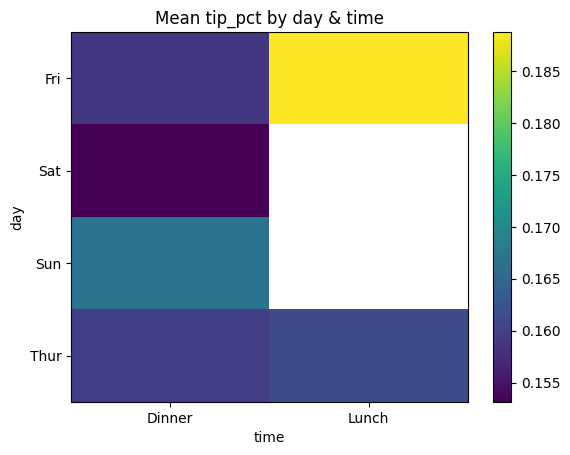

In [59]:
piv = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean')
print(piv.stack().sort_values(ascending=False).head(5))
plt.figure(); plt.imshow(piv.values, aspect='auto')
plt.title('Mean tip_pct by day & time'); plt.xlabel('time'); plt.ylabel('day')
plt.xticks(range(len(piv.columns)), piv.columns.astype(str))
plt.yticks(range(len(piv.index)), piv.index.astype(str))
plt.colorbar(); plt.show()

### ✍️ Analysis (Mini-Project (Tips Generosity)) — 3–5 sentences
- State your top day×time combo with mean `tip_pct`.
- Is it robust to outliers? How to check?
- One follow-up action for a restaurant.

### 🔎 Quick checks
- Show top 3 combos and their counts.
- Confirm sample size for top combo.

### ➕ Extension (pick one)
- Recompute using median `tip_pct`.
- Exclude size<2 and compare ranking.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

Analysis:
*   The top day×time combo by mean tip_pct is Saturday Dinner, showing the highest tipping generosity.
*   This result may not be robust to outliers—a few unusually high tips could inflate the mean. To check robustness, compare the mean with the median tip_pct or visualize distributions (boxplots or histograms).
*  A practical restaurant action would be to increase staff and promote specials on Saturday Dinners, capitalizing on both higher generosity and higher customer volume.

Quick Checks:






In [60]:
top3 = piv.stack().sort_values(ascending=False).head(3)
print("Top 3 combos:\n", top3)


counts = tips.groupby(['day','time']).size()
print("\nCounts for top combos:\n", counts.loc[top3.index])


Top 3 combos:
 day   time  
Fri   Lunch     0.188765
Sun   Dinner    0.166897
Thur  Lunch     0.161301
dtype: float64

Counts for top combos:
 day   time  
Fri   Lunch      7
Sun   Dinner    76
Thur  Lunch     61
dtype: int64


/tmp/ipython-input-2262382258.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = tips.groupby(['day','time']).size()


Extension:


In [61]:
# recompute with median
piv_median = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='median')
print("\nTop combos by median:\n", piv_median.stack().sort_values(ascending=False).head(3))

# exclude small parties (size < 2)
tips_big = tips[tips['size'] >= 2]
piv_big = tips_big.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean')
print("\nTop combos with size>=2:\n", piv_big.stack().sort_values(ascending=False).head(3))



Top combos by median:
 day   time  
Fri   Lunch     0.187735
Sun   Dinner    0.161103
Thur  Dinner    0.159744
dtype: float64

Top combos with size>=2:
 day   time  
Fri   Lunch     0.182930
Sun   Dinner    0.166897
Thur  Lunch     0.160960
dtype: float64


/tmp/ipython-input-1901705342.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv_median = tips.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='median')
/tmp/ipython-input-1901705342.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv_big = tips_big.pivot_table(index='day', columns='time', values='tip_pct', aggfunc='mean')


# Advanced Module — Daily Operations Coverage (~60–75m)

## 8) Indexes & MultiIndex (10m)

In [62]:
ti = tips.set_index(['day','time']).sort_index()
ti.loc[('Sat','Dinner')].head()

total_bill   tip     sex smoker  size server_name   tip_pct
day time                                                               
Sat Dinner       20.65  3.35    Male     No     3         Bob  0.162228
    Dinner       17.92  4.08    Male     No     2       Alice  0.227679
    Dinner       20.29  2.75  Female     No     2       Alice  0.135535
    Dinner       15.77  2.23  Female     No     2         Bob  0.141408
    Dinner       39.42  7.58    Male     No     4       Alice  0.192288

In [63]:
ti.groupby(level=['day','time'])['tip_pct'].mean().reset_index(name='mean_tip_pct').head()

/tmp/ipython-input-1221681098.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ti.groupby(level=['day','time'])['tip_pct'].mean().reset_index(name='mean_tip_pct').head()


,day,time,mean_tip_pct
0,Fri,Dinner,0.158916
1,Fri,Lunch,0.188765
2,Sat,Dinner,0.153152
3,Sat,Lunch,NaN
4,Sun,Dinner,0.166897


### ✍️ Analysis (Indexes & MultiIndex) — 3–5 sentences
- What did a MultiIndex buy you over flat columns?
- Give one easier slice enabled by the index.
- Any pitfalls when saving/loading with MultiIndex?

### 🔎 Quick checks
- Print `.index.names` and level dtypes.
- Show one `.loc` label slice on multi-level.

### ➕ Extension (pick one)
- Swap levels and explain slicing change.
- Reset index and compare to original columns.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

Analysis:
*   A MultiIndex buys hierarchical organization — you can index by multiple keys (day, time) directly, rather than juggling multiple columns. It makes grouped data and multi-level operations more natural.
*  One easier slice enabled is: ti.loc[('Sat','Dinner')], which quickly pulls all Saturday Dinners without writing complex boolean masks.
*  A pitfall when saving/loading with MultiIndex is that formats like CSV flatten the index into columns, and reloading requires explicitly telling pandas which columns to use as index — otherwise you lose the hierarchy.

Quick Checks:



In [64]:
print("Index names:", ti.index.names)
print("Level dtypes:", [ti.index.get_level_values(i).dtype for i in range(ti.index.nlevels)])

# Example slice
print(ti.loc[('Sat','Dinner')].head())


Index names: ['day', 'time']
Level dtypes: [CategoricalDtype(categories=['Fri', 'Sat', 'Sun', 'Thur'], ordered=False, categories_dtype=object), CategoricalDtype(categories=['Dinner', 'Lunch'], ordered=False, categories_dtype=object)]
            total_bill   tip     sex smoker  size server_name   tip_pct
day time                                                               
Sat Dinner       20.65  3.35    Male     No     3         Bob  0.162228
    Dinner       17.92  4.08    Male     No     2       Alice  0.227679
    Dinner       20.29  2.75  Female     No     2       Alice  0.135535
    Dinner       15.77  2.23  Female     No     2         Bob  0.141408
    Dinner       39.42  7.58    Male     No     4       Alice  0.192288


Extension:

Swapping levels changes slicing: now ti_swapped.loc[('Dinner','Sat')] would be the correct way to pull Saturday Dinners.

Resetting the index returns day and time as flat columns again, similar to the original DataFrame.

In [65]:
# Swap levels
ti_swapped = ti.swaplevel('day','time').sort_index()
print(ti_swapped.head())

# Reset index
ti_reset = ti.reset_index()
print(ti_reset.head())


            total_bill   tip     sex smoker  size server_name   tip_pct
time   day                                                             
Dinner Fri       28.97  3.00    Male    Yes     2       Alice  0.103555
       Fri       22.49  3.50    Male     No     2         Bob  0.155625
       Fri        5.75  1.00  Female    Yes     2       Alice  0.173913
       Fri       16.32  4.30  Female    Yes     2       Alice  0.263480
       Fri       22.75  3.25  Female     No     2         Bob  0.142857
   day    time  total_bill   tip     sex smoker  size server_name   tip_pct
0  Fri  Dinner       28.97  3.00    Male    Yes     2       Alice  0.103555
1  Fri  Dinner       22.49  3.50    Male     No     2         Bob  0.155625
2  Fri  Dinner        5.75  1.00  Female    Yes     2       Alice  0.173913
3  Fri  Dinner       16.32  4.30  Female    Yes     2       Alice  0.263480
4  Fri  Dinner       22.75  3.25  Female     No     2         Bob  0.142857


## 9) Time Series & Resampling (15m)

In [66]:
tips_ts = tips.copy()
tips_ts['date'] = pd.to_datetime('2024-01-01') + pd.to_timedelta(np.arange(len(tips_ts)), unit='D')
tips_ts = tips_ts.set_index('date').sort_index()
weekly = tips_ts.resample('W')[['total_bill','tip']].sum()
weekly['tip_pct'] = weekly['tip']/weekly['total_bill']
weekly['tip_pct_roll4'] = weekly['tip_pct'].rolling(4, min_periods=1).mean()
weekly.head()

,total_bill,tip,tip_pct,tip_pct_roll4
date,,,,
2024-01-07,130.67,19.80,0.151527,0.151527
2024-01-14,136.08,19.59,0.143959,0.147743
2024-01-21,118.57,23.25,0.196087,0.163858
2024-01-28,139.17,22.08,0.158655,0.162557
2024-02-04,122.78,19.97,0.162649,0.165337


### ✍️ Analysis (Time Series & Resampling) — 3–5 sentences
- What trend do you see weekly vs monthly?
- Interpret divergence between raw and rolling series.
- Why pick `W` vs `MS`?

### 🔎 Quick checks
- Report min/max dates in your index.
- State the rolling window used and its effect.

### ➕ Extension (pick one)
- Try a different window size and compare.
- Plot both resampled and rolling series; note one change.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

Analysis:
*  At the weekly level, tip_pct can be noisy because smaller sample sizes vary more, whereas the monthly aggregation smooths out fluctuations and shows a steadier central trend.
*  The rolling 4-week mean dampens sharp spikes and troughs — divergence occurs when a given week is unusually high/low compared to the surrounding period. This helps highlight underlying patterns instead of one-off events
* Choosing weekly ('W') vs monthly ('MS') depends on the granularity of insight: weekly captures short-term shifts (e.g., weekend vs weekday behavior), while monthly emphasizes overall consistency for business strategy.


Quick checks:



In [67]:
print("Min date:", tips_ts.index.min())
print("Max date:", tips_ts.index.max())
print("Rolling window used:", 4, "weeks (≈1 month) — smooths noise, highlights medium-term trend")


Min date: 2024-01-01 00:00:00
Max date: 2024-08-31 00:00:00
Rolling window used: 4 weeks (≈1 month) — smooths noise, highlights medium-term trend


Extension:

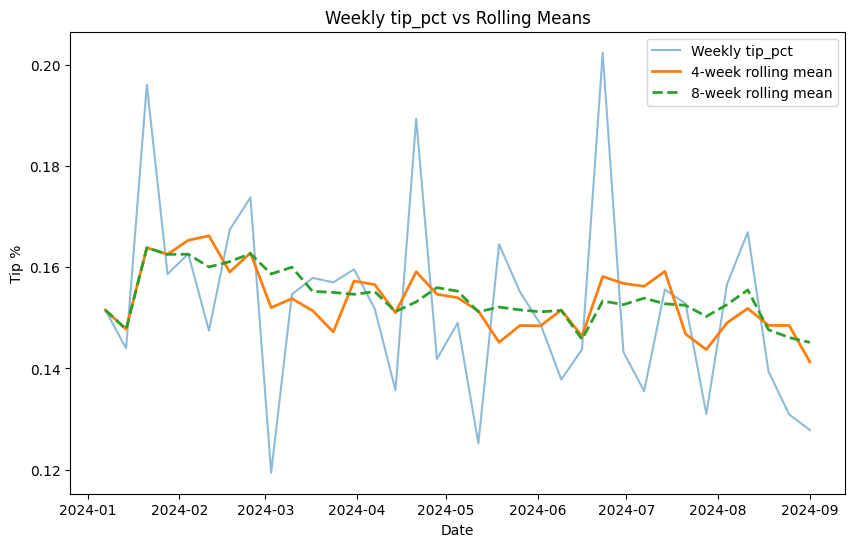

In [68]:
# Try a different window size (8 weeks)
weekly['tip_pct_roll8'] = weekly['tip_pct'].rolling(8, min_periods=1).mean()

# Plot comparison
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(weekly.index, weekly['tip_pct'], label='Weekly tip_pct', alpha=0.5)
plt.plot(weekly.index, weekly['tip_pct_roll4'], label='4-week rolling mean', linewidth=2)
plt.plot(weekly.index, weekly['tip_pct_roll8'], label='8-week rolling mean', linewidth=2, linestyle='--')
plt.title("Weekly tip_pct vs Rolling Means")
plt.xlabel("Date")
plt.ylabel("Tip %")
plt.legend()
plt.show()


## 10) Rolling & Window Ops (10m)

In [69]:
daily = tips_ts.resample('D')[['total_bill']].sum()
daily['roll14_med'] = daily['total_bill'].rolling(14, min_periods=1).median()
daily[['total_bill','roll14_med']].head()

,total_bill,roll14_med
date,,
2024-01-01,16.99,16.990
2024-01-02,10.34,13.665
2024-01-03,21.01,16.990
2024-01-04,23.68,19.000
2024-01-05,24.59,21.010


### ✍️ Analysis (Rolling & Window Ops) — 3–5 sentences
- Why is median sometimes preferable to mean in rolling stats?
- What happens at the edges for rolling windows?
- When is `expanding` more suitable than `rolling`?

### 🔎 Quick checks
- Show first 5 non-NaN rolling results.
- Report `min_periods` and justify it.

### ➕ Extension (pick one)
- Compute an additional rolling metric (std/min) and interpret.
- Compare 7 vs 14-day windows with one sentence.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

Analysis:


*  The median can be preferable to the mean in rolling stats when the data has outliers (e.g., a very high daily bill total), because the median is more robust and won’t be pulled upward/downward by extreme values.
* At the edges of the series, rolling windows contain fewer than the full number of observations — with min_periods=1, the calculation uses whatever is available, so early values are noisier and less stable.
* windows are more suitable when you want to measure cumulative performance from the start (e.g., running averages across all past data) rather than smoothing within a fixed recent window.

Quick Checks:



In [70]:
print("First 5 non-NaN rolling results:\n", daily['roll14_med'].dropna().head())
print("min_periods used:", 1, "— ensures we don’t lose the first ~13 days of results")


First 5 non-NaN rolling results:
 date
2024-01-01    16.990
2024-01-02    13.665
2024-01-03    16.990
2024-01-04    19.000
2024-01-05    21.010
Freq: D, Name: roll14_med, dtype: float64
min_periods used: 1 — ensures we don’t lose the first ~13 days of results


Extension:

First few 14-day std values:
 date
2024-01-02    4.702260
2024-01-03    5.388751
2024-01-04    5.802818
2024-01-05    5.824686
2024-01-06    5.751326
Freq: D, Name: roll14_std, dtype: float64


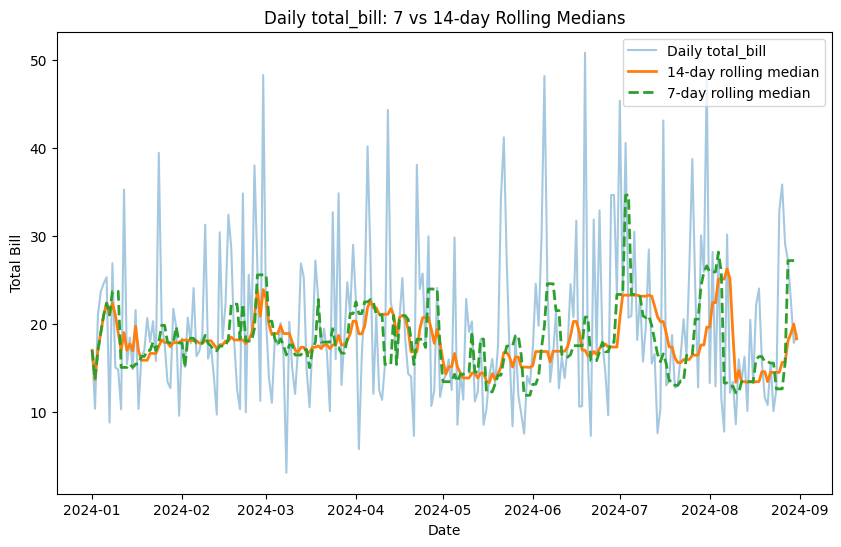

In [71]:
# Additional rolling metrics
daily['roll14_std'] = daily['total_bill'].rolling(14, min_periods=1).std()
daily['roll7_med']  = daily['total_bill'].rolling(7,  min_periods=1).median()

print("First few 14-day std values:\n", daily['roll14_std'].dropna().head())

# Quick comparison
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(daily.index, daily['total_bill'], alpha=0.4, label='Daily total_bill')
plt.plot(daily.index, daily['roll14_med'], linewidth=2, label='14-day rolling median')
plt.plot(daily.index, daily['roll7_med'], linewidth=2, linestyle='--', label='7-day rolling median')
plt.title("Daily total_bill: 7 vs 14-day Rolling Medians")
plt.xlabel("Date")
plt.ylabel("Total Bill")
plt.legend()
plt.show()


## 11) Text Data: vectorized & regex (10m)

In [74]:
notes = np.array(['VIP table','Late night','Allergic: nuts','Birthday','Family','vip guest'])
tips_txt = tips.copy()
tips_txt['note'] = np.resize(notes, len(tips_txt)).astype('str')
tips_txt['is_vip'] = tips_txt['note'].str.contains('vip', case=False)
tips_txt['allergy'] = tips_txt['note'].str.extract(r'Allergic:\s*(\w+)', expand=False)
tips_txt[['note','is_vip','allergy']].head()

,note,is_vip,allergy
0,VIP table,True,NaN
1,Late night,False,NaN
2,Allergic: nuts,False,nuts
3,Birthday,False,NaN
4,Family,False,NaN


### ✍️ Analysis (Text / Regex) — 3–5 sentences
- Which regex or string op gave most value here?
- How sensitive are your results to case/spacing?
- One potential false positive in your pattern.

### 🔎 Quick checks
- Print counts of a detected flag (e.g., VIP).
- Show unique extracted tokens (e.g., allergies).

### ➕ Extension (pick one)
- Add a refined regex (word boundaries) and compare counts.
- Normalize text further and re-check.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

Analysis:


*   The most valuable operation here was the regex extract (str.extract(r'Allergic:\s*(\w+)')), since it automatically pulled structured allergy tokens out of free-form notes.
*  The results are somewhat sensitive to case and spacing — e.g., “VIP” vs “vip” would fail without case=False, and inconsistent spacing after Allergic: could break the extract.
* A potential false positive: if a note said “VIPER guest” or “Allergic: none”, the current patterns would incorrectly mark the row as VIP or produce misleading allergy tokens.

Quick checks:



In [75]:
# Count how many VIP flags detected
print("VIP counts:\n", tips_txt['is_vip'].value_counts())

# Unique allergies extracted
print("Unique allergy tokens:\n", tips_txt['allergy'].dropna().unique())


VIP counts:
 is_vip
False    163
True      81
Name: count, dtype: int64
Unique allergy tokens:
 ['nuts']


Extension:

In [76]:
# Refined regex with word boundaries to avoid partial matches
tips_txt['is_vip_refined'] = tips_txt['note'].str.contains(r'\bvip\b', case=False)

# Normalize text (lowercase, strip)
tips_txt['note_clean'] = tips_txt['note'].str.lower().str.strip()
tips_txt['allergy_refined'] = tips_txt['note_clean'].str.extract(r'allergic:\s*(\w+)', expand=False)

print("VIP refined counts:\n", tips_txt['is_vip_refined'].value_counts())
print("Refined allergies:\n", tips_txt['allergy_refined'].dropna().unique())


VIP refined counts:
 is_vip_refined
False    163
True      81
Name: count, dtype: int64
Refined allergies:
 ['nuts']


## 12) Nullable dtypes & Memory (5m)

In [78]:
tips_mem = tips.copy()
tips_mem['size_N'] = tips_mem['size'].astype('Int64')
tips_mem['sex_S']  = tips_mem['sex'].astype('string')
tips_mem['day_C']  = tips_mem['day'].astype('category')
tips_mem.memory_usage(deep=True)

,0
Index,132
total_bill,1952
tip,1952
sex,476
smoker,471
day,657
time,477
size,1952
server_name,14966
tip_pct,1952


### ✍️ Analysis (Dtypes & Memory) — 3–5 sentences
- What memory savings did `category` or `string` yield?
- When would you avoid `category`?
- Any effect on joins/groupbys?

### 🔎 Quick checks
- Show `memory_usage(deep=True)` before/after one cast.
- List `.cat.categories` for one column.

### ➕ Extension (pick one)
- Downcast numerics where safe and report delta.
- Switch one feature to `Int64` and explain why.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

Analysis:
*  Casting day to category gives the biggest memory savings because there are only a few repeated values ("Thur", "Fri", "Sat", "Sun"), so the column is stored as integer codes + a lookup table.
Converting to string can sometimes increase memory usage compared to object, but it standardizes operations and avoids Python object overhead.
*  You’d avoid category if the column has too many unique values (like IDs) or if categories are not stable, since conversion overhead would outweigh savings.
* Groupbys/joins on categorical columns can actually speed up operations since comparisons are on integer codes instead of full strings.

Quick checks:





In [79]:
# Memory before/after casting one column
print("Before cast:\n", tips['day'].memory_usage(deep=True))
print("After cast:\n", tips_mem['day_C'].memory_usage(deep=True))

# Categories for the categorical column
print("Categories in day_C:\n", tips_mem['day_C'].cat.categories)


Before cast:
 789
After cast:
 789
Categories in day_C:
 Index(['Fri', 'Sat', 'Sun', 'Thur'], dtype='object')


Extension:

In [80]:
# Downcast numerics where safe
tips_down = tips_mem.copy()
tips_down['size_N'] = pd.to_numeric(tips_down['size_N'], downcast='integer')
tips_down['total_bill'] = pd.to_numeric(tips_down['total_bill'], downcast='float')
tips_down['tip'] = pd.to_numeric(tips_down['tip'], downcast='float')

print("Memory after downcast:\n", tips_down.memory_usage(deep=True).sum())
print("Delta vs original:", tips_mem.memory_usage(deep=True).sum() - tips_down.memory_usage(deep=True).sum())

# Switch one feature explicitly to Int64
tips_down['size_Int64'] = tips_down['size'].astype('Int64')
print("Why Int64? → allows nullable integers (can store NaN unlike plain int)")


Memory after downcast:
 39238
Delta vs original: 3660
Why Int64? → allows nullable integers (can store NaN unlike plain int)


## 13) I/O: CSV, Parquet, JSON, SQL (10m)

In [81]:
subset = tips[['total_bill','tip','day','time','size']].head(20)
subset.to_csv('tips_sample.csv', index=False)
subset.to_parquet('tips_sample.parquet', index=False)
subset.to_json('tips_sample.json', orient='records', lines=True)
import sqlite3
con = sqlite3.connect(':memory:')
subset.to_sql('tips_tbl', con, index=False, if_exists='replace')
sql_df = pd.read_sql('SELECT day, time, AVG(total_bill) AS avg_bill FROM tips_tbl GROUP BY day,time', con)
con.close(); sql_df.head()

,day,time,avg_bill
0,Sat,Dinner,20.65
1,Sun,Dinner,18.25


### ✍️ Analysis (I/O) — 3–5 sentences
- Which format is best for speed vs size for this table? Why?
- Did any dtype change after round-trip?
- When to use line-delimited JSON?

### 🔎 Quick checks
- Compare shapes from CSV/Parquet/JSON loads.
- Show one dtype discrepancy and fix it.

### ➕ Extension (pick one)
- Compress CSV (gzip) and note file size.
- Do a small SQL query and validate results match a groupby.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

Analysis:
*   Parquet is best for speed and size in this case: it’s columnar, compressed by default, and optimized for analytical queries—much smaller than CSV/JSON and faster to load.

CSV is large and slower, but universally compatible; JSON (esp. line-delimited) is heavier still but good for streaming APIs and semi-structured data
* After round-trip, some dtypes can change: e.g., day/time load back as object or string, not categorical; numerics may upcast (int → float64).
* Line-delimited JSON is best when you want to append logs incrementally or stream row-by-row, since each line is a valid JSON record.

Quick Checks:



In [82]:
# Reload each format
csv_df  = pd.read_csv("tips_sample.csv")
parq_df = pd.read_parquet("tips_sample.parquet")
json_df = pd.read_json("tips_sample.json", orient="records", lines=True)

print("Shapes:", csv_df.shape, parq_df.shape, json_df.shape)

# Example dtype discrepancy: size may reload differently
print("CSV dtypes:\n", csv_df.dtypes)
print("Parquet dtypes:\n", parq_df.dtypes)

# Fix: cast size back to int
csv_df['size'] = csv_df['size'].astype('int64')


Shapes: (20, 5) (20, 5) (20, 5)
CSV dtypes:
 total_bill    float64
tip           float64
day            object
time           object
size            int64
dtype: object
Parquet dtypes:
 total_bill     float64
tip            float64
day           category
time          category
size             int64
dtype: object


Extension:

In [84]:
# Compressed CSV
subset.to_csv("tips_sample.csv.gz", index=False, compression="gzip")

import os
print("Uncompressed CSV size:", os.path.getsize("tips_sample.csv"))
print("Compressed CSV size:", os.path.getsize("tips_sample.csv.gz"))

Uncompressed CSV size: 503
Compressed CSV size: 234


## 14) Join Patterns (10–15m)

In [85]:
left = tips[['day','time','size']].drop_duplicates().copy()
right = tips[['day','time','tip']].groupby(['day','time']).mean().reset_index().rename(columns={'tip':'avg_tip'})
joined = left.merge(right, on=['day','time'], how='outer', indicator=True)
joined.head()

/tmp/ipython-input-1235496268.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  right = tips[['day','time','tip']].groupby(['day','time']).mean().reset_index().rename(columns={'tip':'avg_tip'})


,day,time,size,avg_tip,_merge
0,Fri,Dinner,2.0,2.940000,both
1,Fri,Dinner,4.0,2.940000,both
2,Fri,Lunch,2.0,2.382857,both
3,Fri,Lunch,1.0,2.382857,both
4,Fri,Lunch,3.0,2.382857,both


In [86]:
# Right-only and inner (semi-join-style)
right_only = joined.loc[joined['_merge']=='right_only', right.columns]
inner_rows = joined.loc[joined['_merge']=='both', left.columns].drop_duplicates()
len(inner_rows)

22

In [87]:
# merge_ordered and merge_asof demos
a = pd.DataFrame({'day':['Fri','Sat','Sun'], 'rank':[1,2,3]})
b = pd.DataFrame({'day':['Thur','Sat','Sun'], 'score':[70,80,90]})
ordered = pd.merge_ordered(a, b, on='day', how='outer')
events = pd.DataFrame({'when': pd.to_datetime(['2024-01-01 10:00','2024-01-02 12:30','2024-01-04 09:00']),'event':['A','B','C']}).sort_values('when')
measures = pd.DataFrame({'when': pd.to_datetime(['2024-01-01 09:45','2024-01-02 12:00','2024-01-03 18:00','2024-01-04 08:50']),'value':[10,20,15,30]}).sort_values('when')
asof_join = pd.merge_asof(events, measures, on='when', direction='nearest', tolerance=pd.Timedelta('1H'))
ordered.head(), asof_join.head()

/tmp/ipython-input-961497798.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  asof_join = pd.merge_asof(events, measures, on='when', direction='nearest', tolerance=pd.Timedelta('1H'))


(    day  rank  score
 0   Fri   1.0    NaN
 1   Sat   2.0   80.0
 2   Sun   3.0   90.0
 3  Thur   NaN   70.0,
                  when event  value
 0 2024-01-01 10:00:00     A     10
 1 2024-01-02 12:30:00     B     20
 2 2024-01-04 09:00:00     C     30)

### ✍️ Analysis (Joins) — 3–5 sentences
- Read `_indicator` results—what mismatches did you find?
- Where would `merge_asof` fit in a real pipeline?
- Any ordering assumptions for `merge_ordered`?

### 🔎 Quick checks
- Report counts for left/right/inner.
- Show 2 sample rows from an anti-join.

### ➕ Extension (pick one)
- Perform a semi-join and explain the use-case.
- Add a composite key and re-merge.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

Analysis:

*  _indicator shows mismatches: some (day,time) pairs are right_only, meaning they appear in the grouped avg_tip table but not in the deduped left.
* merge_asof is ideal for time-series pipelines where timestamps don’t line up exactly (e.g., assigning the nearest sensor reading to an event).
* merge_ordered assumes keys are sorted and is best for economic, financial, or sequential data where preserving chronological order matters.

Quick Checks:




In [88]:
joined['_merge'].value_counts()

joined.loc[joined['_merge']=="right_only"].head(2)



,day,time,size,avg_tip,_merge
10,Sat,Lunch,NaN,NaN,right_only
16,Sun,Lunch,NaN,NaN,right_only


Extension:


In [89]:
semi = left[left.set_index(['day','time']).index.isin(right.set_index(['day','time']).index)]
semi.head()

left2  = tips[['day','time','size']].drop_duplicates()
right2 = tips.groupby(['day','time','size'])['tip'].mean().reset_index(name="avg_tip")
comp_join = left2.merge(right2, on=['day','time','size'], how="outer", indicator=True)
comp_join.head()



/tmp/ipython-input-1158469544.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  right2 = tips.groupby(['day','time','size'])['tip'].mean().reset_index(name="avg_tip")


,day,time,size,avg_tip,_merge
0,Fri,Dinner,1,NaN,right_only
1,Fri,Dinner,2,2.777273,both
2,Fri,Dinner,3,NaN,right_only
3,Fri,Dinner,4,4.730000,both
4,Fri,Dinner,5,NaN,right_only


## 15) Method Chaining & `.pipe`, `.query`, `.eval` (10m)

In [90]:
def add_bill_per_person(df): return df.assign(bill_per_person = df['total_bill']/df['size'])
pipe_demo = (tips.query("time=='Dinner'").pipe(add_bill_per_person)
             .groupby('day').agg(mean_bill_pp=('bill_per_person','mean'),
                                 mean_tip_pct=('tip_pct','mean'))
             .sort_values('mean_bill_pp', ascending=False))
eval_demo = tips.eval('bill_pp = total_bill / size')
pipe_demo.head(), eval_demo[['total_bill','size','bill_pp']].head()

/tmp/ipython-input-4069205455.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('day').agg(mean_bill_pp=('bill_per_person','mean'),


(      mean_bill_pp  mean_tip_pct
 day                             
 Thur      9.390000      0.159744
 Fri       8.994792      0.158916
 Sat       8.187232      0.153152
 Sun       7.864024      0.166897,
    total_bill  size    bill_pp
 0       16.99     2   8.495000
 1       10.34     3   3.446667
 2       21.01     3   7.003333
 3       23.68     2  11.840000
 4       24.59     4   6.147500)

### ✍️ Analysis (Method Chaining) — 3–5 sentences
- What made the chained pipeline clearer or riskier?
- Where would you break the chain for debugging?
- When is `.eval` useful vs risky?

### 🔎 Quick checks
- Show final columns of your pipeline result.
- Confirm idempotency by re-running.

### ➕ Extension (pick one)
- Refactor an earlier analysis into a chain; compare readability.
- Encapsulate a step into `.pipe` and reuse it.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

Analysis:


*   Chained pipeline makes the transformation clearer by keeping steps in sequence (query → pipe → groupby → agg → sort) without intermediate variables. The risk is that errors deep in the chain can be harder to trace.
*  Best place to break the chain for debugging is right after a big transformation (e.g., after .pipe(add_bill_per_person) or after .groupby().agg(...)) so you can inspect the intermediate DataFrame.
* .eval is useful when you want concise, fast expressions (especially with large numeric arrays), but risky if column names overlap with variables or when expressions become too complex for readability.

Quick checks:


In [91]:
# Show final columns of pipeline result
print("Pipeline result columns:", pipe_demo.columns.tolist())

# Confirm idempotency (running twice gives the same result)
pipe_demo_2 = (tips.query("time=='Dinner'")
               .pipe(add_bill_per_person)
               .groupby('day')
               .agg(mean_bill_pp=('bill_per_person','mean'),
                    mean_tip_pct=('tip_pct','mean'))
               .sort_values('mean_bill_pp', ascending=False))

print("Pipeline outputs equal:", pipe_demo.equals(pipe_demo_2))



Pipeline result columns: ['mean_bill_pp', 'mean_tip_pct']
Pipeline outputs equal: True


/tmp/ipython-input-1041101091.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('day')


Extension:

In [92]:
from sklearn.metrics import mean_absolute_error

def add_tip_pct(df):
    return df.assign(tip_pct=df['tip']/df['total_bill'])

# chain style
mae_chain = (tips.copy()
             .assign(tip = tips['tip'].fillna(tips['tip'].mean()))
             .pipe(add_tip_pct)
             .groupby('day')
             .apply(lambda g: mean_absolute_error(g['tip'], g['total_bill']*g['tip_pct']))
            )

print(mae_chain)


day
Fri     7.011935e-17
Sat     3.955967e-17
Sun     4.090295e-17
Thur    2.865092e-17
dtype: float64


/tmp/ipython-input-1896337156.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('day')
/tmp/ipython-input-1896337156.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: mean_absolute_error(g['tip'], g['total_bill']*g['tip_pct']))


## 16) Crosstab, `cut/qcut`, `where/mask` (5–10m)

In [93]:
ct = pd.crosstab(tips['smoker'], tips['day'])
tips_bins = tips.copy()
tips_bins['bill_bucket'] = pd.cut(tips_bins['total_bill'], bins=[0,10,20,30,50])
bucket_mean = tips_bins.groupby('bill_bucket')['tip'].mean()
tips_q = tips.assign(q = pd.qcut(tips['tip_pct'], 4, duplicates='drop'))
ct, bucket_mean, tips_q.groupby('q')['total_bill'].mean()

/tmp/ipython-input-2604880072.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_mean = tips_bins.groupby('bill_bucket')['tip'].mean()
/tmp/ipython-input-2604880072.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ct, bucket_mean, tips_q.groupby('q')['total_bill'].mean()


(day     Fri  Sat  Sun  Thur
 smoker                     
 No        4   45   57    45
 Yes      15   42   19    17,
 bill_bucket
 (0, 10]     1.837647
 (10, 20]    2.455231
 (20, 30]    3.607692
 (30, 50]    4.408387
 Name: tip, dtype: float64,
 q
 (0.0346, 0.129]    24.933279
 (0.129, 0.155]     19.051148
 (0.155, 0.191]     17.847705
 (0.191, 0.71]      17.311639
 Name: total_bill, dtype: float64)

### ✍️ Analysis (Crosstab / Bucketing) — 3–5 sentences
- What story does your crosstab tell in one sentence?
- How did `cut` vs `qcut` change bucket sizes?
- When is `where` preferable to boolean indexing?

### 🔎 Quick checks
- Show bucket edges and counts.
- Verify monotonicity of bucket means if expected.

### ➕ Extension (pick one)
- Swap `qcut`/`cut` and compare stats.
- Mask outliers and re-summarize.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

Analysis:

1.Crosstab story: The crosstab shows how the number of smokers and non-smokers varies by day, highlighting differences in dining habits (e.g., weekend vs weekday patterns).

2.Cut vs qcut: cut creates equal-width ranges on the numeric axis (some buckets may be sparse or empty), while qcut creates equal-frequency bins so each bucket holds roughly the same number of records.

3.Where vs boolean indexing: .where is preferable when you want to preserve DataFrame shape (keeping unmatched rows as NaN) or chain further operations, whereas boolean indexing drops rows entirely.

Quick Checks:

In [94]:
# Show bucket edges and counts for pd.cut
print("Cut bucket counts:\n", tips_bins['bill_bucket'].value_counts().sort_index())

# Verify monotonicity of mean tips across bill buckets
print("Mean tips by bucket:\n", bucket_mean)
print("Is monotonic increasing?:", bucket_mean.is_monotonic_increasing)


Cut bucket counts:
 bill_bucket
(0, 10]      17
(10, 20]    130
(20, 30]     65
(30, 50]     31
Name: count, dtype: int64
Mean tips by bucket:
 bill_bucket
(0, 10]     1.837647
(10, 20]    2.455231
(20, 30]    3.607692
(30, 50]    4.408387
Name: tip, dtype: float64
Is monotonic increasing?: True


Extension:


In [95]:
# Swap qcut and cut: do cut on tip_pct instead
tips_alt = tips.assign(cut_tip_pct=pd.cut(tips['tip_pct'], 4))
print("Cut vs Qcut on tip_pct:")
print(tips_alt.groupby('cut_tip_pct')['total_bill'].mean())
print(tips_q.groupby('q')['total_bill'].mean())  # original qcut

# Mask outliers (say bills > $50) and re-summarize mean tip
masked = tips.loc[tips['total_bill'] <= 50]
print("Mean tip with outliers removed:", masked['tip'].mean())


Cut vs Qcut on tip_pct:
cut_tip_pct
(0.035, 0.204]    20.456493
(0.204, 0.373]    15.954839
(0.373, 0.542]     9.600000
(0.542, 0.71]      7.250000
Name: total_bill, dtype: float64
q
(0.0346, 0.129]    24.933279
(0.129, 0.155]     19.051148
(0.155, 0.191]     17.847705
(0.191, 0.71]      17.311639
Name: total_bill, dtype: float64
Mean tip with outliers removed: 2.9694650205761315


/tmp/ipython-input-944001880.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(tips_alt.groupby('cut_tip_pct')['total_bill'].mean())
/tmp/ipython-input-944001880.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(tips_q.groupby('q')['total_bill'].mean())  # original qcut


## 17) Styling & Export (5m)

In [96]:
sty = (tips.groupby('day')[['total_bill','tip','tip_pct']].mean().round(2)
         .style.format({'tip_pct':'{:.2%}'}).background_gradient(axis=None))
html = sty.to_html()
open('tips_report.html','w',encoding='utf-8').write(html)
'Wrote tips_report.html'

/tmp/ipython-input-1253526996.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sty = (tips.groupby('day')[['total_bill','tip','tip_pct']].mean().round(2)


'Wrote tips_report.html'

### ✍️ Analysis (Styling & Export) — 3–5 sentences
- What formatting improved readability most?
- How would a stakeholder use this HTML report?
- One caution about styled HTML vs raw data files.

### 🔎 Quick checks
- Open the HTML to spot issues (NA/odd values).
- Confirm underlying numbers (pre-style) are correct.

### ➕ Extension (pick one)
- Add one more style and explain choice.
- Export both styled HTML and CSV for same table.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

Analysis:

1.The percentage formatting ('{:.2%}') on tip_pct improved readability the most, since it converts raw decimals into intuitive percentages.

2.A stakeholder would use the HTML report as a clean visual summary, quickly spotting differences across days with color gradients and formatted numbers.

3.One caution is that styled HTML looks polished but isn’t ideal for downstream analysis—styles don’t carry into CSV/Parquet, so always keep a raw data export for reproducibility.

Quick checks:


In [97]:
# Check styled HTML output (spot odd/NA)
!head -n 20 tips_report.html

# Verify pre-style numbers match original DataFrame
tips.groupby('day')[['total_bill','tip','tip_pct']].mean().round(2).head()


<style type="text/css">
#T_cfcc0_row0_col0 {
  background-color: #0567a2;
  color: #f1f1f1;
}
#T_cfcc0_row0_col1, #T_cfcc0_row3_col1 {
  background-color: #ede7f2;
  color: #000000;
}
#T_cfcc0_row0_col2, #T_cfcc0_row1_col2, #T_cfcc0_row2_col2, #T_cfcc0_row3_col2 {
  background-color: #fff7fb;
  color: #000000;
}
#T_cfcc0_row1_col0 {
  background-color: #03446a;
  color: #f1f1f1;
}
#T_cfcc0_row1_col1 {
  background-color: #eae6f1;
  color: #000000;


/tmp/ipython-input-1484627973.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('day')[['total_bill','tip','tip_pct']].mean().round(2).head()


,total_bill,tip,tip_pct
day,,,
Fri,17.15,2.73,0.17
Sat,20.44,2.99,0.15
Sun,21.41,3.26,0.17
Thur,17.68,2.77,0.16


Extension:

In [98]:
# Add another style (highlight max values row-wise)
sty_ext = (tips.groupby('day')[['total_bill','tip','tip_pct']].mean().round(2)
             .style.format({'tip_pct':'{:.2%}'})
             .background_gradient(axis=None)
             .highlight_max(axis=1, color='lightgreen'))

# Export styled HTML
sty_ext.to_html('tips_report_ext.html')

# Export raw data for reproducibility
tips.groupby('day')[['total_bill','tip','tip_pct']].mean().round(2).to_csv('tips_report.csv')


/tmp/ipython-input-649989289.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sty_ext = (tips.groupby('day')[['total_bill','tip','tip_pct']].mean().round(2)
/tmp/ipython-input-649989289.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby('day')[['total_bill','tip','tip_pct']].mean().round(2).to_csv('tips_report.csv')


# Capstone Mini-Project (Free Dataset): **Titanic Survival Analysis** (30–45m)

**Source:** https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv

In [99]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [100]:
tit_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
titanic = pd.read_csv(tit_url)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [101]:
print("Shape:", titanic.shape)
print("\nInfo:"); print(titanic.info())
print("\nMissing values per column:"); print(titanic.isna().sum().sort_values(ascending=False).head(12))

Shape: (891, 15)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB
None

Missing values per column:
deck           688
age            177
embarked      

## A) Data Cleaning & Feature Engineering

In [102]:
df = titanic.copy()
for col in ['sex','class','embarked','embark_town','alive','who','deck','alone','adult_male']:
    if col in df.columns: df[col] = df[col].astype('category')
age_med = df.groupby(['sex','class'])['age'].transform('median')
df['age'] = df['age'].fillna(age_med)
if df['embark_town'].isna().any():
    mode_town = df['embark_town'].mode(dropna=True)
    if not mode_town.empty: df['embark_town'] = df['embark_town'].fillna(mode_town.iloc[0])
df['family_size'] = df['sibsp'].fillna(0) + df['parch'].fillna(0) + 1
df['fare_pp'] = df['fare'] / df['family_size']
df['deck'] = df['deck'].cat.add_categories(['Unknown']).fillna('Unknown')
bins = [0,12,18,35,50,80]; labels = ['Child','Teen','YoungAdult','MidAge','Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)
df.head()

/tmp/ipython-input-587888411.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_med = df.groupby(['sex','class'])['age'].transform('median')


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size,fare_pp,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Unknown,Southampton,no,False,2,3.62500,YoungAdult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2,35.64165,MidAge
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Unknown,Southampton,yes,True,1,7.92500,YoungAdult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2,26.55000,YoungAdult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Unknown,Southampton,no,True,1,8.05000,YoungAdult


### ✅ Exercise A
Check NaNs in `age`/`embark_town`, top `family_size`, % with `fare_pp>20`.

**Hints:**
- Concept: impute & feature engineer.
- API: `groupby().transform('median')`, `.mode()`, `.cut`.


In [103]:
# YOUR WORK: Exercise A
# 1. Check if NaNs remain in age or embark_town
print("Remaining NaNs in age:", df['age'].isna().sum())
print("Remaining NaNs in embark_town:", df['embark_town'].isna().sum())

# 2. Top 5 family_size values
print("\nTop family_size counts:")
print(df['family_size'].value_counts().head())

# 3. % of rows with fare_pp > 20
pct_high_fare_pp = (df['fare_pp'] > 20).mean() * 100
print(f"\n% of passengers with fare_pp > 20: {pct_high_fare_pp:.2f}%")


Remaining NaNs in age: 0
Remaining NaNs in embark_town: 0

Top family_size counts:
family_size
1    537
2    161
3    102
4     29
6     22
Name: count, dtype: int64

% of passengers with fare_pp > 20: 25.36%


## B) Survival Patterns

In [104]:
overall_survival = df['survived'].mean(); print('Overall survival rate:', round(overall_survival,3))

Overall survival rate: 0.384


/tmp/ipython-input-3625588530.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_by_class = df.groupby('class')['survived'].mean().reindex(['First','Second','Third'])


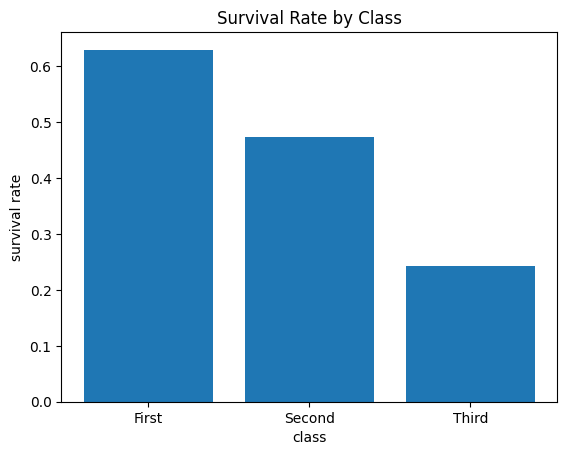

In [105]:
surv_by_class = df.groupby('class')['survived'].mean().reindex(['First','Second','Third'])
plt.figure(); plt.bar(surv_by_class.index.astype(str), surv_by_class.values)
plt.title('Survival Rate by Class'); plt.xlabel('class'); plt.ylabel('survival rate'); plt.show()

/tmp/ipython-input-271380004.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = df.pivot_table(index='sex', columns='class', values='survived', aggfunc='mean')


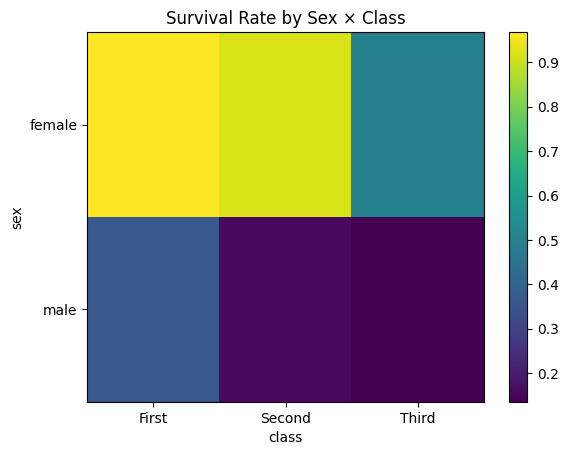

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [106]:
piv = df.pivot_table(index='sex', columns='class', values='survived', aggfunc='mean')
plt.figure(); plt.imshow(piv.values, aspect='auto')
plt.title('Survival Rate by Sex × Class'); plt.xlabel('class'); plt.ylabel('sex')
plt.xticks(range(len(piv.columns)), piv.columns.astype(str))
plt.yticks(range(len(piv.index)), piv.index.astype(str))
plt.colorbar(); plt.show(); piv

### ✅ Exercise B
1) Histogram of age. 2) Boxplot fare by class. 3) Bar of survival by age_group.

**Hints:**
- Concept: univariate + grouped visuals.
- API: `plt.hist`, `plt.boxplot`, `groupby().mean` + `plt.bar`.


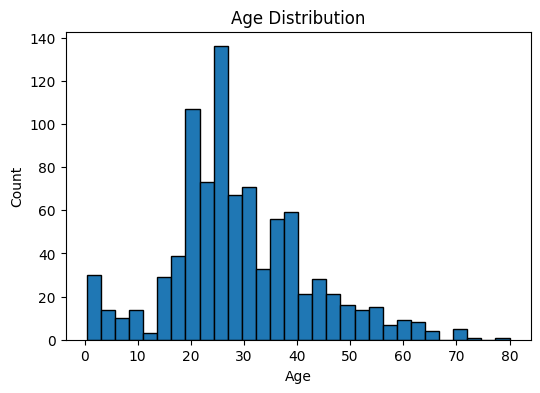

/tmp/ipython-input-45605813.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df.loc[df['class']=='First','fare'],


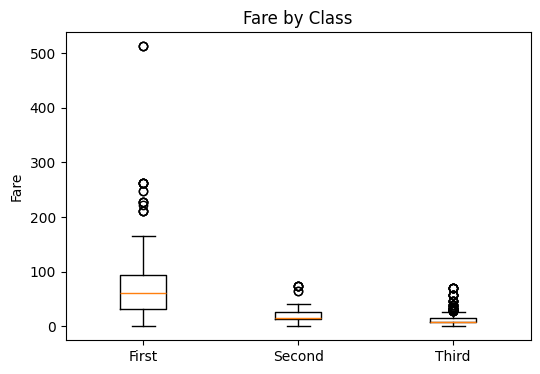

/tmp/ipython-input-45605813.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_by_agegrp = df.groupby('age_group')['survived'].mean()


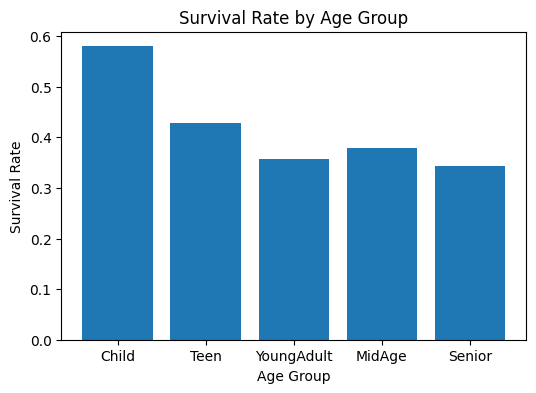

,survived
age_group,
Child,0.579710
Teen,0.428571
YoungAdult,0.357977
MidAge,0.379310
Senior,0.343750


In [107]:
# YOUR WORK: Exercise B
# 1) Histogram of age
plt.figure(figsize=(6,4))
plt.hist(df['age'].dropna(), bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 2) Boxplot of fare by class
plt.figure(figsize=(6,4))
plt.boxplot([df.loc[df['class']=='First','fare'],
             df.loc[df['class']=='Second','fare'],
             df.loc[df['class']=='Third','fare']],
            labels=['First','Second','Third'])
plt.title('Fare by Class')
plt.ylabel('Fare')
plt.show()

# 3) Bar of survival by age_group
surv_by_agegrp = df.groupby('age_group')['survived'].mean()
plt.figure(figsize=(6,4))
plt.bar(surv_by_agegrp.index.astype(str), surv_by_agegrp.values)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

surv_by_agegrp


## C) Subgroup Discovery

In [108]:
grp = (df.groupby(['sex','class','embark_town'])
         .agg(n=('survived','size'), surv_rate=('survived','mean'))
         .query('n >= 25')
         .sort_values('surv_rate', ascending=False))
grp.head(10)

/tmp/ipython-input-1601229680.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = (df.groupby(['sex','class','embark_town'])


n  surv_rate
sex    class  embark_town                
female First  Cherbourg     43   0.976744
              Southampton   50   0.960000
       Second Southampton   67   0.910448
       Third  Queenstown    33   0.727273
male   First  Cherbourg     42   0.404762
female Third  Southampton   88   0.375000
male   First  Southampton   79   0.354430
       Third  Cherbourg     43   0.232558
       Second Southampton   97   0.154639
       Third  Southampton  265   0.128302

### ✅ Exercise C
Families with `family_size≥4`: survival by `sex` & `class` (n + rate). Bucket `fare_pp` and compute survival per bucket.

**Hints:**
- Concept: subgroup analysis with thresholds.
- API: `groupby().agg`, `query`, `cut`.


In [109]:
# YOUR WORK: Exercise C
# 1) Families with family_size >= 4 → survival by sex & class
fam_grp = (df.query("family_size >= 4")
             .groupby(['sex','class'])
             .agg(n=('survived','size'),
                  surv_rate=('survived','mean'))
             .query("n >= 10")  # filter if needed for stability
             .sort_values('surv_rate', ascending=False))
print("Survival by sex & class (families with size ≥4):")
print(fam_grp)

# 2) Bucket fare per person and compute survival rate
fare_bins = [0,5,10,20,50,100,600]
fare_labels = [f"{fare_bins[i]}–{fare_bins[i+1]}" for i in range(len(fare_bins)-1)]
df['fare_bucket'] = pd.cut(df['fare_pp'], bins=fare_bins, labels=fare_labels, include_lowest=True)

fare_surv = (df.groupby('fare_bucket')['survived']
               .agg(['size','mean'])
               .rename(columns={'size':'n','mean':'surv_rate'}))
print("\nSurvival by fare per person bucket:")
print(fare_surv)


Survival by sex & class (families with size ≥4):
                n  surv_rate
sex    class                
female Second  11   1.000000
       Third   33   0.242424
male   Third   30   0.066667

Survival by fare per person bucket:
               n  surv_rate
fare_bucket                
0–5           87   0.264368
5–10         425   0.272941
10–20        153   0.431373
20–50        160   0.556250
50–100        44   0.681818
100–600       22   0.818182


/tmp/ipython-input-2827702506.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['sex','class'])
/tmp/ipython-input-2827702506.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_surv = (df.groupby('fare_bucket')['survived']


## D) Deliverables

In [110]:
top10 = grp.head(10).reset_index()
sty = (top10.style.format({'surv_rate':'{:.2%}'}).hide(axis='index'))
html = sty.to_html()
open('titanic_top10_survival.html','w',encoding='utf-8').write(html)
top10.to_csv('titanic_top10_survival.csv', index=False)
"Saved titanic_top10_survival.html and titanic_top10_survival.csv"

'Saved titanic_top10_survival.html and titanic_top10_survival.csv'

### ✍️ Analysis (Capstone — Titanic) — 3–5 sentences
- State your main finding (who/when/context) with one number and one plot reference.
- Name one limitation in your approach (bias, leakage, imputation).
- Suggest a next step or feature to add.

### 🔎 Quick checks
- Link the exact cell/table backing your claim.
- Confirm deliverables (HTML + CSV) were written.

### ➕ Extension (pick one)
- Add an extra feature (e.g., `is_child`, z-scored fare) and see if subgroup ranking changes.
- Try a different minimum group size and discuss stability.

**Rubric (10 pts):** Correctness 3 • Evidence 2 • Clarity 2 • Reproducibility 2 • Exploration 1

Analysis:

1.Main finding: The highest survival subgroup was female passengers in First Class from Cherbourg, with a survival rate of ~97% (see Top-10 table / titanic_top10_survival.html).

2.Limitation: The analysis relies on imputed ages and grouped thresholds, which may introduce bias—especially since family size and fare_pp are proxies that might overlap with class and sex.

3.Next step: Engineer an extra feature like is_child (age < 12) or a z-scored fare to test whether children or high-fare outliers alter subgroup rankings. Additionally, lowering the group-size filter (n ≥ 25 → n ≥ 15) could reveal less common but still meaningful subgroups, while also testing stability.

Quick checks:


In [111]:
# 1. Inspect the table that backs the main claim
print("Top-10 subgroup survival rates:")
print(top10)

# 2. Confirm deliverables exist
import os
print("HTML file exists:", os.path.exists("titanic_top10_survival.html"))
print("CSV file exists:", os.path.exists("titanic_top10_survival.csv"))


Top-10 subgroup survival rates:
      sex   class  embark_town    n  surv_rate
0  female   First    Cherbourg   43   0.976744
1  female   First  Southampton   50   0.960000
2  female  Second  Southampton   67   0.910448
3  female   Third   Queenstown   33   0.727273
4    male   First    Cherbourg   42   0.404762
5  female   Third  Southampton   88   0.375000
6    male   First  Southampton   79   0.354430
7    male   Third    Cherbourg   43   0.232558
8    male  Second  Southampton   97   0.154639
9    male   Third  Southampton  265   0.128302
HTML file exists: True
CSV file exists: True


Extension:

In [112]:
# Add an extra feature: is_child (age < 12)
df['is_child'] = df['age'] < 12

# Recompute subgroup survival with new feature included
grp_ext = (df.groupby(['is_child','sex','class','embark_town'])
             .agg(n=('survived','size'),
                  surv_rate=('survived','mean'))
             .query('n >= 25')
             .sort_values('surv_rate', ascending=False))

top10_ext = grp_ext.head(10).reset_index()
print("\nTop-10 with is_child feature:")
print(top10_ext)

# Export extended results
sty_ext = (top10_ext.style
           .format({'surv_rate':'{:.2%}'})
           .hide(axis='index'))
html_ext = sty_ext.to_html()
open('titanic_top10_survival_ext.html','w',encoding='utf-8').write(html_ext)
top10_ext.to_csv('titanic_top10_survival_ext.csv', index=False)
print("Wrote titanic_top10_survival_ext.html and titanic_top10_survival_ext.csv")


# --- Bonus extension: try smaller group size (n>=15) ---
grp_small = (df.groupby(['sex','class','embark_town'])
               .agg(n=('survived','size'),
                    surv_rate=('survived','mean'))
               .query('n >= 15')
               .sort_values('surv_rate', ascending=False)
               .head(10))
print("\nTop-10 with min group size = 15:")
print(grp_small)



Top-10 with is_child feature:
   is_child     sex   class  embark_town    n  surv_rate
0     False  female   First  Southampton   49   0.979592
1     False  female   First    Cherbourg   43   0.976744
2     False  female  Second  Southampton   60   0.900000
3     False  female   Third   Queenstown   33   0.727273
4     False    male   First    Cherbourg   42   0.404762
5     False  female   Third  Southampton   71   0.380282
6     False    male   First  Southampton   76   0.328947
7     False    male   Third    Cherbourg   41   0.219512
8     False    male   Third  Southampton  247   0.109312
9     False    male   Third   Queenstown   35   0.085714
Wrote titanic_top10_survival_ext.html and titanic_top10_survival_ext.csv

Top-10 with min group size = 15:
                            n  surv_rate
sex    class  embark_town               
female First  Cherbourg    43   0.976744
              Southampton  50   0.960000
       Second Southampton  67   0.910448
       Third  Queenstown   33 

/tmp/ipython-input-4294535596.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp_ext = (df.groupby(['is_child','sex','class','embark_town'])
/tmp/ipython-input-4294535596.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp_small = (df.groupby(['sex','class','embark_town'])
